In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

We can *adapt linear regression to describe nonlinear* relationships by transforming one-dimensional data to Higher 
Dimensional data according to **BASIS FUNCTIONS**.  
Note that this is *still a linear model* as the relationship is still x against y, but we are deriving values from x
and the coefficients are not interdependent.

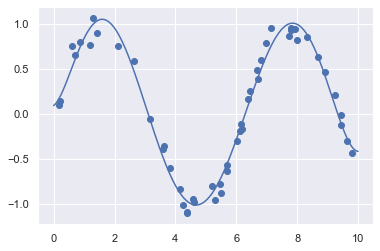

In [17]:
#Polynomial Basis Functions
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
rng = np.random.RandomState(0)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model = make_pipeline(PolynomialFeatures(degree = 7, include_bias = False), LinearRegression())
yfit = poly_model.fit(x[:,np.newaxis], y).predict(xfit[:, None])
plt.scatter(x, y)
plt.plot(xfit, yfit)

(0, 10)

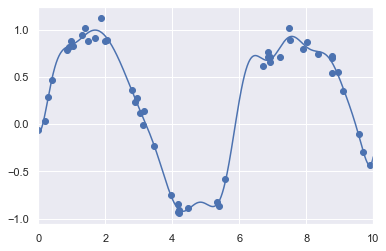

In [32]:
#Gaussian Basis Function
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

#Uniformly-spaced Gaussian features for one-dimensional inputs
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_class = 2.0):
        self.N = N
        self.width_class = width_class
    @staticmethod
    def _gauss_basis(x, y, width, axis = None):
        arg = (x - y)/ width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y = None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width = self.width_class * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:,:,np.newaxis], self.centers_, self.width, axis = 1)
    
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
yfit = gauss_model.fit(x[:,np.newaxis], y).predict(xfit[:,None])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

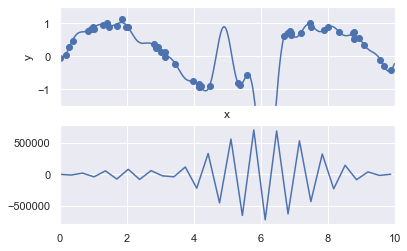

In [34]:
#Overfitting occurs when basis functions overlap and the coefficients of adjacent basis functions cancel each other
def basis_plot(model, title = None):
    model.fit(x[:, np.newaxis], y)
    f, ax = plt.subplots(2, sharex = True)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:,None]))
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim = (-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlim = (0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

## Regularisation
To limit such spikes in the model, one can penalise large values of the model parameters.  
### $L2$ Regularisation (Ridge Regularisation/ Thikonov Regularisation)
- Penalises sum of squares (2-norms) of model coefficients
- $P = \alpha \sum_{n=1}^{N} {\theta_n}^2 $
- $\alpha$ controls the strength of the penalty: $\alpha \to 0$ recovers the standard linear regression; $\alpha \to \infty$ suppresses all model responses. **Cross Validation** can be used to determine the value  
- **Advantage**: highly efficient. Similar computational cost as that of the original linear regression  

### $L1$ Regularisation (Lasso Regularisation)
- Penalises absolute sum (1-norm) of model coefficients
- $P = \alpha \sum_{n=1}^{N} |\theta_n|$
- Favours ***sparse*** models: model coefficients are set to 0 whenever possible

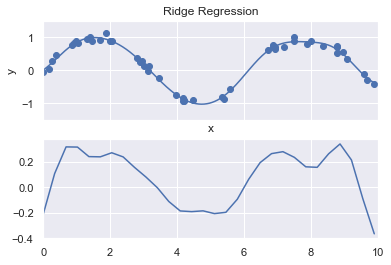

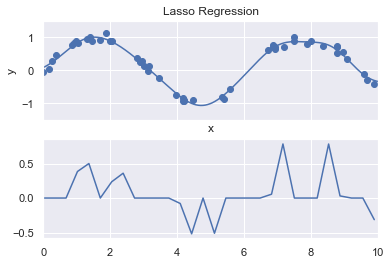

In [35]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha = 0.1))
basis_plot(model, title = 'Ridge Regression')

from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha = 0.002))
basis_plot(model, title = 'Lasso Regression')